# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import seaborn as sns
from scipy.stats import norm
import matplotlib.mlab as mlab
import math
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

First, take a quick look at the basic stats on the temperature data

In [2]:
# Your work here.
df.describe().round(2)

,temperature,heart_rate
count,130.00,130.00
mean,98.25,73.76
std,0.73,7.06
min,96.30,57.00
25%,97.80,69.00
50%,98.30,74.00
75%,98.70,79.00
max,100.80,89.00


Check if the sample distribution is a normal one by fitting the data and plotting the along the fit nornal distribution

Mean of fit normal distribution: 98.2492
Standard deviation of fit normal distribution: 0.7304


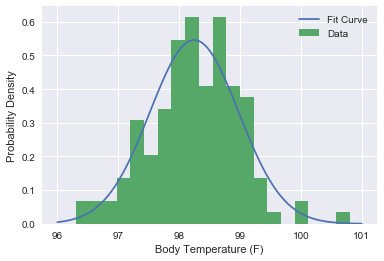

In [3]:
# Fit the temperature data to a normal distribution, obtain its mean and standard deviation
n_mu, n_sigma = scs.norm.fit(df.temperature)
print('Mean of fit normal distribution: %.4f' % n_mu)
print('Standard deviation of fit normal distribution: %.4f' % n_sigma)

# Plot the distribution with fit values
x = np.linspace(96, 101, 100)
plt.plot(x, norm.pdf(x, loc=n_mu, scale=n_sigma), label='Fit Curve')
plt.hist(df.temperature, bins=20, normed=True, label='Data')
plt.xlabel('Body Temperature (F)')
plt.ylabel('Probability Density')
plt.legend()

It is difficult to assess just by a visual inspection, so conduct a normality test.

In [4]:
# Normality test
stats, pvalue = scs.normaltest(df.temperature)
print(stats)
print('p-value = %.4f' % pvalue)

2.70380143332
p-value = 0.2587


The sample distribution is could be distributed normally considering high p-value of ~0.26. In this situation, I would use one-sample test with t-statistic because: 
1. We only have one sample to test (temperature) and we want to estimate the population mean. Thus, use one-sample test
2. Sample size is relatively large (n > 30) 
3. Exact population variance is unknown
4. t-ststistic is a more conservative than z-statistic

Now actually conduct the one-sample t-test to see if 98.6 is a good estimate of the population mean.

In [5]:
# Test if the population mean for body temperature is 98.6F with t-statistic
t_statistic, pvalue = scs.ttest_1samp(df.temperature, 98.6)
print('t-statistic = %.4f' % t_statistic)
print('p-value = %.10f' % pvalue)

t-statistic = -5.4548
p-value = 0.0000002411


p-value is very small (~2.0e-7), thus it is quite likely that the real  population mean is <i>not</i> 98.6F.<br>
Now try using the Z-statistic assuming normal distribution

In [6]:
z = (98.6 - n_mu) /n_sigma 
pval_z = (1-  scs.norm.cdf(0.5 + z)) * 2
print('z-statistic = %.4f' % z)
print('p-val = %.4f' % pval_z)

z-statistic = 0.4803
p-val = 0.3270


Assuming a normally distributed sample distribution, the p-vale is very high and the value 96.8F is <i>not unlikely</i> to be the population mean. The sample distribution is not so well described by the normal distribution, so t-test should be employed as shown above.

Now calculate margin of error and interval for 95% confidene level  using t-statistic

In [7]:
# Set confidence level and calculate critical value for t statistic
confidence = 0.95
t_critical = scs.t.ppf(q = ((1 + confidence)/2), df=(len(df.temperature) - 1))

# calculate mean and standard deviation of the temperature data
mean = df.temperature.mean()
stdev = df.temperature.std()

# calculate margin of error
sigma = stdev/math.sqrt(len(df.temperature))  # Standard deviation estimate
m_of_e = t_critical * sigma

# calculate confidence interval
CI = (mean - m_of_e, mean + m_of_e) 

print('--- Basic stats for the temperature data ---')
print('Sample Mean %.4f' % mean)
print('Sample Standard Deviation %.4f' % stdev)
print('\n--- Parameters to obtain 95% Confidence Interval ---')
print("t-critical value: %.4f" % t_critical)
print('Margin of Error %.4f' % m_of_e)
print('%d%% Confidence Interval %.4fF ~ %.4fF' % (100*confidence, CI[0], CI[1]))

--- Basic stats for the temperature data ---
Sample Mean 98.2492
Sample Standard Deviation 0.7332

--- Parameters to obtain 95% Confidence Interval ---
t-critical value: 1.9785
Margin of Error 0.1272
95% Confidence Interval 98.1220F ~ 98.3765F


Based on the 95% confidence interval, if the body temperature is below 98.1F or above 98.4F, it could be considered abnormal (only 5% probability of having that temperature in a healthy/normal state). This is consistent with the above analysis that 98.6F is unlikely to be the real mean of the population.

Now compare the temperatures between males and females.

In [8]:
# Check for gender difference
df.groupby('gender').describe()

heart_rate                                                     \
            count       mean       std   min   25%   50%   75%   max   
gender                                                                 
F            65.0  74.153846  8.105227  57.0  68.0  76.0  80.0  89.0   
M            65.0  73.369231  5.875184  58.0  70.0  73.0  78.0  86.0   

       temperature                                                      
             count       mean       std   min   25%   50%   75%    max  
gender                                                                  
F             65.0  98.393846  0.743488  96.4  98.0  98.4  98.8  100.8  
M             65.0  98.104615  0.698756  96.3  97.6  98.1  98.6   99.5

In [9]:
# Slice the dataset into two
temp_male = df[df.gender == 'M'].temperature
temp_female = df[df.gender == 'F'].temperature

Conduct the t-test assuming that male and femal temperature samples are independent from each other.
Now check if the two samples are normally distributed.

In [10]:
stat_m, pval_m = scs.normaltest(temp_male)
stat_f, pval_f = scs.normaltest(temp_female)
print('p-value for male: %.4f' % pval_m)
print('p-value for female: %.4f' % pval_f)

p-value for male: 0.6404
p-value for female: 0.0937


Based on the p-values, there is a 10% chance that the female samples are not drawn from normally distributed population. Thus, as the above analysis, use t-test to compare the means of male and female body temperatures.

In [11]:
# calcuate means and standard deviations for each dataset
male_mean = temp_male.mean()
male_stdev = temp_male.std()
female_mean = temp_female.mean()
female_stdev = temp_female.std()

# conduct t-test to see if the means are significantly different than expected by chance
t_statistic2, pvalue2 = scs.ttest_ind(temp_male, temp_female)

# print outputs
print('Male Stats : Mean = %.3fF, Standard Deviation = %.3f' % (male_mean, male_stdev))
print('Female Stats : Mean = %.3fF, Standard Deviation = %.3f' % (female_mean, female_stdev))
print('\n')
print('t-test result: p-value = %.4f' % pvalue2)

Male Stats : Mean = 98.105F, Standard Deviation = 0.699
Female Stats : Mean = 98.394F, Standard Deviation = 0.743


t-test result: p-value = 0.0239


Low p-value of 0.02 indicates that the difference in mean between the males and the females are statistically significant (there's ~2% chance that they're difference by chance).

Now calculate the 95% confidence interval for female mean to see if 98.6F falls within in the interval. I picked female population for this test because their mean is higher than that of males.

In [12]:
# calculate margin of error for female temperature
sigma_f = female_stdev/math.sqrt(len(temp_female))  # Standard deviation estimate
m_of_e_f = t_critical * sigma_f

# calculate confidence interval
CI = (female_mean - m_of_e_f, female_mean + m_of_e_f) 

print('--- Parameters to obtain 95% Confidence Interval for mean of female body temperature ---')
print("t-critical value: %.4f" % t_critical)
print('Margin of Error %.4f' % m_of_e)
print('%d%% Confidence Interval %.4fF ~ %.4fF' % (100*confidence, CI[0], CI[1]))

--- Parameters to obtain 95% Confidence Interval for mean of female body temperature ---
t-critical value: 1.9785
Margin of Error 0.1272
95% Confidence Interval 98.2114F ~ 98.5763F


Based on my analysis of the sample population, mean body temperature of 98.6F suggested by Wunderlich is statistically incorrect. The actual mean lies between 98.1F ~ 98.4F at 95% confidence level. Even for the females, who have the higher average body temeprature than the males, 98.6F is slightly above the normal range at 95% confidence level (98.2F1 ~ 98.58F). But there is a slight chance (~2.5%) that Wunderlich obtained the 98.6F value by chance if he had sampled only the female population! In any case, the real average body temeprature of the human population is quite likely below 98.6F based on this sample of 130 people.